<div style="text-align: center;">
    <h1 style="color: green;">Anexo 12</h1>
    <h3>Proyecto 12: Analisis de Sentimiento</h3>
    <hr/>
    <p style="text-align: right;">Mg. Luis Felipe Bustamante Narváez</p>
</div>

En este proyecto vamos a analizar unos dataset que contienen opiniones de usuarios y un análisis previo sobre dichas opiniones, si estas son positivas o negativas. El objetivo es predecir emociones o sentimientos de las personas, basado en los comentarios que dejan al respecto de un producto, situación o cualquier variable que apele a un calificativo.

## Librerías

In [151]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import itertools

## Cargamos los datos

In [152]:
path = 'data/comentarios_peliculas.csv'
df = pd.read_csv(path, encoding='utf-8')

In [153]:
df

,comentario,sentimiento
0,Cada escena estaba llena de emoción y signific...,positivo
1,El guion es predecible y los actores no transm...,negativo
2,Los efectos especiales eran ridículos y poco c...,negativo
3,"Muy mala, esperaba mucho más y me decepcionó.",negativo
4,"Una obra maestra, la mejor película que he vis...",positivo
...,...,...
49995,Cada escena estaba llena de emoción y signific...,positivo
49996,El guion es predecible y los actores no transm...,negativo
49997,"Una película increíble, me encantó cada escena.",positivo
49998,"Terrible, no entiendo cómo alguien puede disfr...",negativo


<Axes: >

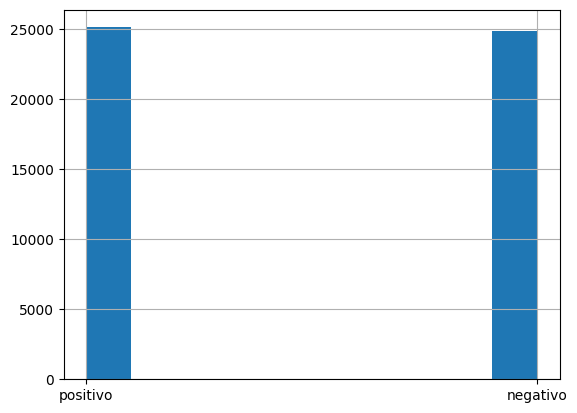

In [154]:
# histograma de sentimientos
df['sentimiento'].hist()

In [155]:
# Anexamos una columna binaria (objetivo)
target_map = {'positivo': 1, 'negativo': 0}
df['target'] = df['sentimiento'].map(target_map)
df

,comentario,sentimiento,target
0,Cada escena estaba llena de emoción y signific...,positivo,1
1,El guion es predecible y los actores no transm...,negativo,0
2,Los efectos especiales eran ridículos y poco c...,negativo,0
3,"Muy mala, esperaba mucho más y me decepcionó.",negativo,0
4,"Una obra maestra, la mejor película que he vis...",positivo,1
...,...,...,...
49995,Cada escena estaba llena de emoción y signific...,positivo,1
49996,El guion es predecible y los actores no transm...,negativo,0
49997,"Una película increíble, me encantó cada escena.",positivo,1
49998,"Terrible, no entiendo cómo alguien puede disfr...",negativo,0


In [156]:
# Agrupamos para obtener el total de datos  (0-> negativo, 1->positivo)
grouped = df.groupby('target').count()
grouped

,comentario,sentimiento
target,,
0,24871,24871
1,25129,25129


## Procesamiento de los Datos

### Entrenamiento

In [157]:
df_train, df_test = train_test_split(df)

In [158]:
df_train

,comentario,sentimiento,target
34636,"Me hizo reír, llorar y reflexionar, todo en un...",positivo,1
34951,Los efectos especiales eran ridículos y poco c...,positivo,1
27374,El desarrollo de los personajes es pobre y sin...,negativo,0
32526,El final fue absurdo y dejó muchas preguntas s...,positivo,1
45042,"Una película increíble, me encantó cada escena.",positivo,1
...,...,...,...
10413,El final fue absurdo y dejó muchas preguntas s...,negativo,0
9468,El guion es predecible y los actores no transm...,negativo,0
11220,El desarrollo de los personajes es pobre y sin...,negativo,0
9298,"No tiene ni pies ni cabeza, simplemente mala.",negativo,0


In [159]:
df_test

,comentario,sentimiento,target
22896,El final fue absurdo y dejó muchas preguntas s...,positivo,1
45709,"Muy entretenida, sin duda la volvería a ver.",positivo,1
12283,"Una pérdida de tiempo total, me arrepiento de ...",negativo,0
43490,"Muy mala, esperaba mucho más y me decepcionó.",negativo,0
4261,"Me aburrí desde el primer minuto, no la recomi...",negativo,0
...,...,...,...
42442,"Muy entretenida, sin duda la volvería a ver.",positivo,1
27913,El desarrollo de los personajes es pobre y sin...,negativo,0
38611,El guion es predecible y los actores no transm...,negativo,0
7900,"Una película increíble, me encantó cada escena.",positivo,1


### Vectorización

In [160]:
# usamos un máximo de 2000 dimensiones
vectorizer = TfidfVectorizer(max_features=2000)

In [161]:
# vectorizamos el entrenamiento
X_train = vectorizer.fit_transform(df_train['comentario'])
X_train

<37500x109 sparse matrix of type '<class 'numpy.float64'>'
	with 305339 stored elements in Compressed Sparse Row format>

In [162]:
X_test = vectorizer.transform(df_test['comentario'])
X_test

<12500x109 sparse matrix of type '<class 'numpy.float64'>'
	with 101755 stored elements in Compressed Sparse Row format>

In [163]:
Y_train = df_train['target']
Y_test = df_test['target']

In [164]:
len(Y_train)

37500

In [165]:
len(Y_test)

12500

## Modelo

In [166]:
model = LogisticRegression(max_iter=500)  #Genera 500 iteraciones cambiando los pesos/sesgos
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [167]:
# Probamos el modelo con los datos originales
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)

In [168]:
# Mostramos la puntuación
print(f'El accuracy de entrenamiento es de {train_accuracy}')
print(f'El accuracy de prueba es de {test_accuracy}')

El accuracy de entrenamiento es de 0.95088
El accuracy de prueba es de 0.94736


## Predicciones

In [169]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [170]:
# Matriz de confusión
conf_matrix_train = confusion_matrix(Y_train, P_train, normalize='true')
conf_matrix_train

array([[0.95143595, 0.04856405],
       [0.04966677, 0.95033323]])

In [171]:
conf_matrix_test = confusion_matrix(Y_test, P_test, normalize='true')
conf_matrix_test

array([[0.94774574, 0.05225426],
       [0.05302909, 0.94697091]])

In [172]:
# Gráfico de la matriz de confusión
def plot_conf_matrix(c_m, color):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(c_m, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g', cmap=color)
    ax.set_xlabel('Predecido')
    ax.set_ylabel('Objetivo')

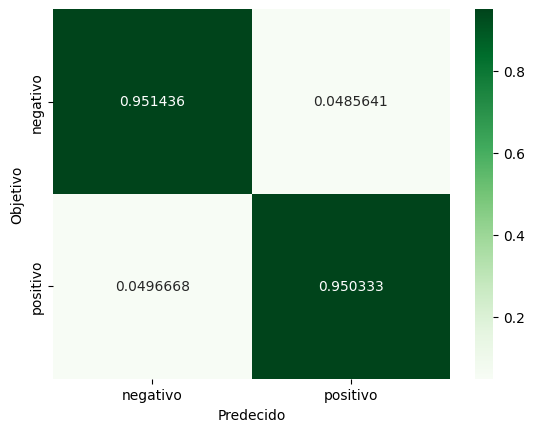

In [173]:
color = 'Greens'  #coolwarm / viridis / Blues / Greens / Reds / magma / cividis
plot_conf_matrix(conf_matrix_train, color)

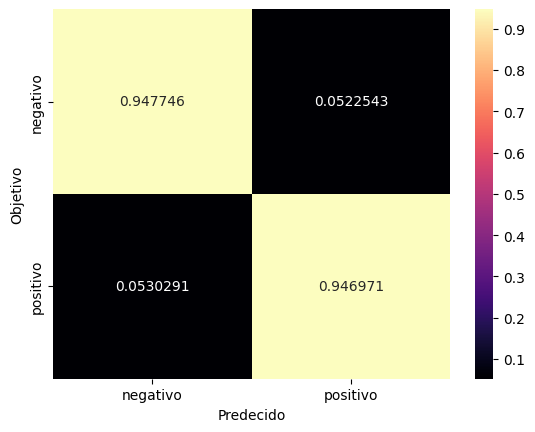

In [174]:
color = 'magma'
plot_conf_matrix(conf_matrix_test, color)

## Análisis de las palabras

In [175]:
# vectorización de palabras
word_index_map = vectorizer.vocabulary_
dict(itertools.islice(word_index_map.items(), 5))

{'me': 56, 'hizo': 45, 'reír': 87, 'llorar': 51, 'reflexionar': 85}

In [176]:
# Coeficiente de las palabras
model.coef_[0][:10]

array([-1.44036264e+00, -1.15267244e+00,  4.48615605e-04,  6.22903789e-01,
       -1.09387316e+00, -1.21140622e+00, -8.04303645e-01,  5.58432574e-01,
       -7.37314123e-01,  2.10564178e+00])

In [186]:
limit = 1.5
print('**Palabras más positivas**\n')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > limit:
        print(word, weight)

**Palabras más positivas**

cada 2.1056417823800224
escena 1.8834508871239404
perfecto 1.7561162834981257
podría 1.7561162834981257
haber 1.7561162834981257
sido 1.7561162834981257
mejor 1.9163405384954952
la 1.7578370103429033
emoción 1.5203371110754182
excelente 1.7906494248075528
visuales 1.7906494248075528
impresionantes 1.7906494248075528
un 1.939566627288709


In [187]:
limit = 1.5
print('**Palabras más negativas**\n')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -limit:
        print(word, weight)

**Palabras más negativas**

el -1.7793619395843912
de -1.8047724408415342
no -1.571073260466105
mala -2.051899328241801
esta -1.5697751259113608


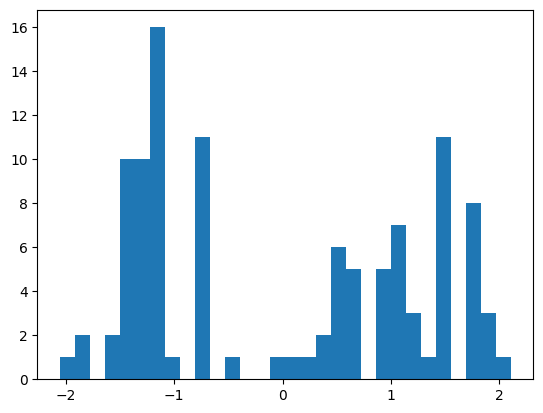

In [179]:
# Gráfico de pesos
plt.hist(model.coef_[0], bins=30)
plt.show()

## Probamos el modelo

In [180]:
prueba = ['estuvo muy entretenida la película',
          'estuvo horrible la película, me aburrí mucho',
         'no la recomiendo']

In [181]:
# Vectorizamos la prueba
x = vectorizer.transform(prueba)
x

<3x109 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [182]:
# Predecimos con el modelo
P = model.predict(x)

In [183]:
# Obtenemos las clases del modelo
clases = model.classes_

In [184]:
# Mostramos la clase de la prueba
for i in range(len(prueba)):
    if clases[P[i]] == 0:
        print(f'El comentario "{prueba[i]}" es Negativo')
    else:
        print(f'El comentario "{prueba[i]}" es Positivo')

El comentario "estuvo muy entretenida la película" es Positivo
El comentario "estuvo horrible la película, me aburrí mucho" es Negativo
El comentario "no la recomiendo" es Negativo


## Conclusiones

<div style="text-align: center;">
    <p>Se realizó un modelo basado en datos de comentarios sobre películas, obteniendo resultados diferentes pero con alta probabilidad de clasificación. Esto permite identificar que la función Sigmoide permiten realizar un óptimo proceso para separar reconocer sentimientos positivos y negativos.</p>
    <hr/>
    <p style="text-align: right;">Mg. Luis Felipe Bustamante Narváez</p>
</div>